# Why does L1 regularization encourage coefficients to shrink to zero?



## Introduction

Regularization is a common method for dealing with overfitting in Machine Learning (ML). The simplest and most widely used methods are L1 (Lasso) and L2 (Ridge). The L1 and L2 regularizations are well covered in numerous tutorials and books. However, I could not find any good geometric or intuitive explanation of why L1  encourages coefficients to shrink to zero. This post tries to address this. 

## Recap

### The Lasso 

The lasso regression is a linear regression model that shrinks the coefficients by imposing a constraint on their magnitude. Namely, it constrains the absolute values of the coefficients: 


$$
\begin{align}
  \hat{\beta}^{lasso} = \underset{\beta}{argmin} & \sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p{x_{ij}\beta_j} \right)^2\\
   \text{ subject to } & \sum_{j=1}^p|\beta_j| \le t
\end{align}
$$

The above equation is the equation (3.51) from "The Elements of Statistical Learning" (ESL) book by Hastie, Tibshirani, and Friedman. 

We can also write the lasso in the equivalent Lagrangian form (3.52), which penalizes the sum of the absolute values of the coefficients:

$$
\hat{\beta}^{lasso} = \underset{\beta}{argmin} 
\left\{
    \frac{1}{2}\sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p{x_{ij}\beta_j} \right)^2
    +\lambda\sum_{j=1}^p|\beta_j|
\right\}
$$

The equations (3.51) and (3.52) are equivalent under the correct $\lambda$ and $t$ hyperparameters. The latter equation (3.52) is more preferred in ML. 

Making $t$ sufficiently small will shrink some of the coefficients to be exactly zero, which we will give geometric intuition later. Thus, the lasso could be used for feature selection, i.e., for identifying unimportant features. 

### The Ridge

The ridge regression is similar to the lasso except it penalizes the sum-of-squares of the coefficients (3.41): 

$$
\hat{\beta}^{ridge} = \underset{\beta}{argmin} 
\left\{
    \frac{1}{2}\sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p{x_{ij}\beta_j} \right)^2
    +\lambda\sum_{j=1}^p\beta_j^2
\right\}
$$

An equivalent way to write the ridge problem is (3.42):

$$
\begin{align}
  \hat{\beta}^{ridge} = \underset{\beta}{argmin} & \sum_{i=1}^N \left( y_i-\beta_0-\sum_{j=1}^p{x_{ij}\beta_j} \right)^2\\
   \text{ subject to } & \sum_{j=1}^p\beta_j^2 \le t
\end{align}
$$

The ridge regression will shrink the coefficient towards zero when $t$ is sufficiently small; however, the coefficients might not be exactly zero.

## Ridge vs Lasso

### Prior expalanations 

The best post I found so far is [https://explained.ai/regularization](https://explained.ai/regularization/), which explains the difference between L1 and L2 empirically by simulating random loss functions. I really encourage you to check out the tutorial.

Another explanation is given by the amazing The Elements of Statistical Learning book:

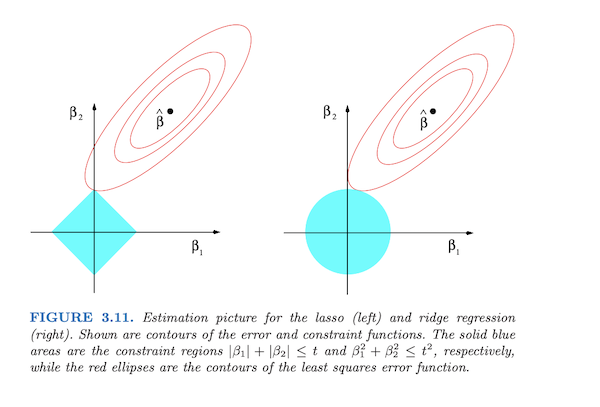

The constraint region for L2 is the disk $\beta_1^2+\beta_2^2 \le t$ (right figure), while it is the diamond $|\beta_1|+|\beta_2| \le t$ for L1 (left figure). Both methods find the first intersection point between the elliptical contours (loss) and the constrained region. The corners of the diamond have one parameter equal to zero. The diamond becomes a rhomboid in higher dimensional space, and has
many corners; there are many more opportunities to intersect at the corners. 

There are cool algebraic explanations as well, for example, given here [https://www.reddit.com/r/MachineLearning/...](https://www.reddit.com/r/MachineLearning/comments/1771jhl/d_how_does_l1_regularization_able_to_drive_a/). 

The explanations given by the book and other places are well-contained, but I could not fully grasp what's so special about the corners w.r.t the other points on the edges. There are only 4 corners and unlimited points on the edges, so shouldn't the probability to touch the other points be higher?



## Geometric Explanation

### WIP beyond this point

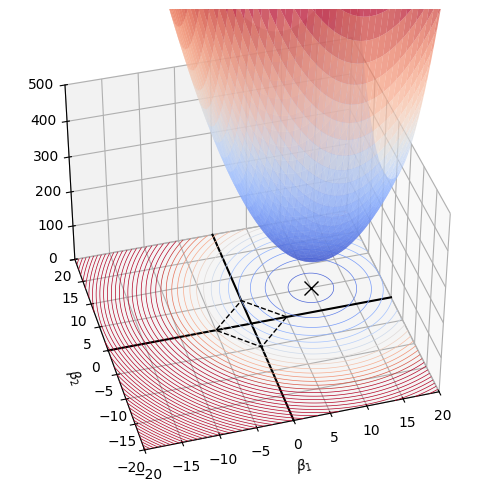

In [39]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Polygon
import mpl_toolkits.mplot3d.art3d as art3d


def loss(b0, b1, cx, cy, bias = 100, scale=2):
    return scale * (b0 - cx) ** 2 + scale * (b1 - cy) ** 2 + bias


def plot3d(reg="l1", t = 3, cx = 7, cy = 1):
    w,h = 20, 20
    beta0 = np.linspace(-w, w, 100)
    beta1 = np.linspace(-h, h, 100)
    B0, B1 = np.meshgrid(beta0, beta1)
    Z = loss(B0, B1, cx=cx, cy=cy)
    # Create a figure and a 3D Axes
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    vmax = 1000
    ax.plot_surface(B0, B1, Z, alpha=0.7, cmap='coolwarm', vmax=vmax)
    ax.set_xlabel("$\\beta_1$", labelpad=0)
    ax.set_ylabel("$\\beta_2$", labelpad=0)
    ax.set_zlim(0,500)
    ax.tick_params(axis='x', pad=0)
    ax.tick_params(axis='y', pad=0)
    ax.set_xlim(-w,w)
    ax.set_ylim(-h,h)
    ax.plot([cx], [cy], marker='x', markersize=10, color='black')
    # draw axes
    ax.plot([-w, w], [0, 0], color='black')
    ax.plot([0, 0], [-h, h], color='black')
    
    contr = ax.contour(B0, B1, Z, levels=50, linewidths=.5, cmap='coolwarm',
                        zdir='z', offset=0, vmax=vmax)
    if reg == "l2":
        safe = Circle(xy=(0,0), radius=t, color="black", fill=False, linestyle='--')
    else:
        safe = Polygon(xy=[(t, 0), (0, t), (-t, 0), (0, -t)], color="black", fill=False, linestyle='--')
    ax.add_patch(safe)
    art3d.pathpatch_2d_to_3d(safe, z=0)
    ax.view_init(elev=39, azim=-106)
    plt.tight_layout()
    plt.show()

plot3d(t=5, cx=10, cy=5)


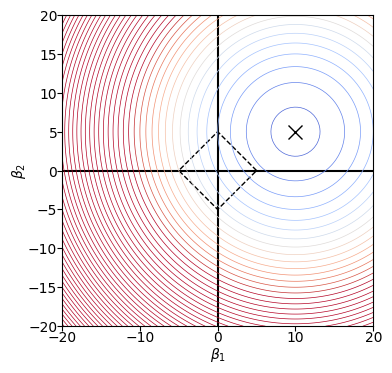

In [9]:
def plot2d(reg="l1", t = 3, cx = 7, cy = 1):
    w,h = 20, 20
    beta0 = np.linspace(-w, w, 100)
    beta1 = np.linspace(-h, h, 100)
    B0, B1 = np.meshgrid(beta0, beta1)
    Z = loss(B0, B1, cx=cx, cy=cy)
    # Create a figure and a 3D Axes
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    vmax = 1000
    ax.set_xlabel("$\\beta_1$", labelpad=0)
    ax.set_ylabel("$\\beta_2$", labelpad=0)
    ax.tick_params(axis='x', pad=0)
    ax.tick_params(axis='y', pad=0)
    ax.set_xlim(-w,w)
    ax.set_ylim(-h,h)
    
    ax.plot([cx], [cy], marker='x', markersize=10, color='black')
    # draw axes
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='black')
    contr = ax.contour(B0, B1, Z, levels=50, linewidths=.5, cmap='coolwarm', vmax=vmax)
    if reg == "l2":
        safe = Circle(xy=(0,0), radius=t, color="black", fill=False, linestyle='--')
    else:
        safe = Polygon(xy=[(t, 0), (0, t), (-t, 0), (0, -t)], color="black", fill=False, linestyle='--')
    ax.add_patch(safe)
    plt.tight_layout()
    plt.show()

plot2d(t=5, cx=10, cy=5)


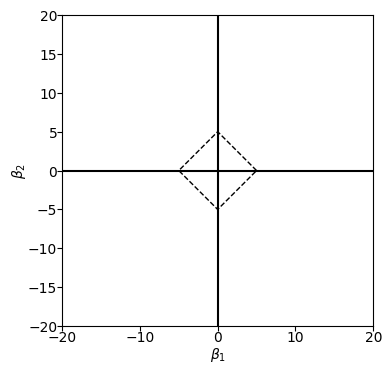

In [10]:
def circle_samples(reg="l1", t = 3, cx = 7, cy = 1):
    w,h = 20, 20
    beta0 = np.linspace(-w, w, 100)
    beta1 = np.linspace(-h, h, 100)
    B0, B1 = np.meshgrid(beta0, beta1)
    Z = loss(B0, B1, cx=cx, cy=cy)
    # Create a figure and a 3D Axes
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    vmax = 1000
    ax.set_xlabel("$\\beta_1$", labelpad=0)
    ax.set_ylabel("$\\beta_2$", labelpad=0)
    ax.tick_params(axis='x', pad=0)
    ax.tick_params(axis='y', pad=0)
    ax.set_xlim(-w,w)
    ax.set_ylim(-h,h)
    
    # draw axes
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='black')
    if reg == "l2":
        safe = Circle(xy=(0,0), radius=t, color="black", fill=False, linestyle='--')
    else:
        safe = Polygon(xy=[(t, 0), (0, t), (-t, 0), (0, -t)], color="black", fill=False, linestyle='--')
    ax.add_patch(safe)
    plt.tight_layout()
    plt.show()

circle_samples(t=5, cx=10, cy=5)

In [36]:
from typing import Literal
import numpy as np
import itertools
from enum import Enum
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import cm
from matplotlib.path import Path
from matplotlib.patches import Circle, Polygon, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d



class Reg(Enum):
    L1 = 1
    L2 = 2


def loss(b0, b1, cx, cy, scale=2.0, bias=100):
    return scale * (b0 - cx) ** 2 + scale * (b1 - cy) ** 2 + bias

beta_range = -20, 20
cx, cy = 5, 15 
vmax = 1000


def base_fig2d():
    # Create a figure and a 3D Axes
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    ax.set_xlabel("$\\beta_1$", labelpad=0)
    ax.set_ylabel("$\\beta_2$", labelpad=0)
    ax.tick_params(axis='x', pad=0)
    ax.tick_params(axis='y', pad=0)
    ax.set_xlim(*beta_range)
    ax.set_ylim(*beta_range)

    # draw axes
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

    return (fig, ax)


def make_reg_shape(reg: Reg, t: float, color="k"):
    if reg == Reg.L1:
        return Polygon(xy=[(t, 0), (0, t), (-t, 0), (0, -t)], color=color, fill=False, linestyle='--')
    else: 
        return Circle(xy=(0, 0), radius=t, color=color, fill=False, linestyle='--')
  

def base_fig2d():
    # Create a figure and a 3D Axes
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot()
    ax.set_aspect('equal')
    ax.set_xlabel("$\\beta_1$", labelpad=0)
    ax.set_ylabel("$\\beta_2$", labelpad=0)
    ax.tick_params(axis='x', pad=0)
    ax.tick_params(axis='y', pad=0)
    ax.set_xlim(*beta_range)
    ax.set_ylim(*beta_range)

    # draw axes
    ax.axhline(y=0, color='black')
    ax.axvline(x=0, color='black')

    return (fig, ax)


def loss_contour(ax):
    beta0 = np.linspace(*beta_range, 100)
    beta1 = np.linspace(*beta_range, 100)
    B0, B1 = np.meshgrid(beta0, beta1)
    Z = loss(B0, B1, cx=cx, cy=cy)

    ax.contour(B0, B1, Z, levels=50, linewidths=.5, cmap='coolwarm', vmax=vmax)
    # draw the global minima
    ax.plot([cx], [cy], marker='x', markersize=10, color='black')
   


def plot2d(t, reg: Reg):
    _, ax = base_fig2d()

    # draw the regularization safe region
    ax.add_patch(make_reg_shape(reg=reg, t=t))
    loss_contour(ax)    
    plt.tight_layout()
    plt.show()


def l1_tangent_circle_locations(t: float, radius: float) -> list[np.array]:
    def is_corner(v):
        return min(abs(v[0]), abs(v[1])) <= radius / np.sqrt(2) + 1e-3

    vertices = make_reg_shape(Reg.L1, t=t+np.sqrt(2) * radius).get_path().interpolated(50).vertices
    vertices = vertices.tolist()
    new_vertices = []

    while is_corner(vertices[-1]):
        vertices.insert(0, vertices.pop(-1))
    vertices.reverse() 
    locations = []
    for i in range(8):
        should_be_corner = i % 2 == 0
        new_vertices = []
        while len(vertices) > 0 and is_corner(vertices[-1]) == should_be_corner: 
            v = vertices.pop()
            if should_be_corner:
                if abs(v[0]) <= abs(v[1]):
                    corner = [0, np.sign(v[1]) * t]
                else:
                    corner = [np.sign(v[0]) * t, 0]

                vec = np.array(v) - np.array(corner)
                vec = (vec / np.linalg.norm(vec)) * radius
                new_vertices.append(corner + vec)
            else:
                new_vertices.append(v)
        locations.append(np.array(new_vertices))
    return locations 


def plot_l1_and_circle(t: float, cx: float, cy: float, radius: float):
    fig, ax = base_fig2d()
    diamond = make_reg_shape(Reg.L1, t=t)
    circle = Circle(xy=(cx, cy), radius=radius, color='g', fill=False)

    circle_locations = l1_tangent_circle_locations(t, radius)
    plots = []
    for i, locations in enumerate(circle_locations): 
        color = 'g' if i % 2 == 0 else 'b'
        plots.append(ax.plot([], [], color=color, linewidth=2)[0])
    ax.add_patch(circle)
    ax.add_patch(diamond)
    def update(frame):
        remaining = frame
        for plot, locations in zip(plots, circle_locations):
            need = min(remaining, len(locations))
            remaining -= need
            plot.set_xdata(locations[:need, 0])
            plot.set_ydata(locations[:need, 1])
            if remaining == 0 and need > 0:
                last = locations[need - 1]
                circle.set_center(last)
                circle.set_color(plot.get_color())

    num_frames = np.sum([len(l) for l in circle_locations])
    plt.tight_layout()
    ani = animation.FuncAnimation(fig, func=update, frames=range(0, num_frames, 2), interval=30)
    return ani


ani = plot_l1_and_circle(t=6, cx=7, cy=0, radius=6)

html=ani.to_html5_video()
plt.close()

from IPython.display import HTML
HTML(html)